In [1]:
__author__ = 'Guillermo Damke <gdamke@gmail.com>, Francisco Förster <francisco.forster@gmail.com>, Alice Jacques <alice.jacques@noirlab.edu>'
__version__ = '20210119' # yyyymmdd;
__datasets__ = ['Iris flower dataset']
__keywords__ = ['Introduction to Machine Learning', 'Supervised Machine Learning', 'La Serena School for Data Science']

<hr/>

# Introduction to Supervised Machine Learning - Practicum

*In original form by Francisco Forster, Centro de Modelamiento Matemático (CMM), Universidad de Chile / Instituto Milenio de Astrofísica (MAS). Adaptated for DataLab by Guillermo Damke and Alice Jacques.*

#### This notebook is part of the curriculum of the 2019 La Serena School for Data Science

<hr/>

**This notebook provides practical examples of the concepts and definitions introduced in [Notebook 1](https://github.com/noaodatalab/notebooks-latest/blob/master/06_EPO/LaSerenaSchoolForDataScience/2019/05_Supervised_ML_I/05_Supervised_ML_1_intro.ipynb). We recommend that you check out that Notebook before if you need to review the concepts.**

## Table of Contents

* [The Scikit-learn API](#1---The-Scikit-learn-API)

* [Two classes and one feature classification example](#2---Two-classes-and-one-feature-classification-example)

* [Evaluation of the Classifier performance](#3---Evaluation-of-the-classifier-performance)

# Summary
This notebook consists of some practical examples to the topics presented in the previous introductory notebooks about Machine Learning (ML) basics ([notebook on concepts](https://github.com/noaodatalab/notebooks-latest/blob/master/06_EPO/LaSerenaSchoolForDataScience/2019/03_Intro_Machine_Learning_basics/Intro_Machine_Learning_basics.ipynb) and [practicum](https://github.com/noaodatalab/notebooks-latest/blob/master/06_EPO/LaSerenaSchoolForDataScience/2019/04_Intro_Machine_Learning_practical/Intro_Machine_Learning_practical.ipynb)). In particular, we will cover the topics listed above using a dataset with two classes and one feature.

# 1 - The Scikit-learn API

The `scikit-learn` library is a popular Open Source implementation of tools and algorithms for Machine Learning in Python.

Its API is implemented following these principles:

* The base (Python) object is the estimator.

* These objects can be any object that learns from data:
    * Classification
    * Regression
    * Clustering
    * Transformer 


* Pass position arguments (`*args`) and keyword arguments (`**kwargs`) to the estimator when defining the instance of the object:

```python
    estimator = Estimator(*args, **kwargs)
```

* The model fitting is implemented via the `fit` method, which is provided for each estimator.

```python
    estimator.fit(X, y)
```
    
* The computed (output) parameters have an underscore appended:

```python
    estimator.coef_
```

* Method to predict probability is defined as a function of the estimator:

```python
    estimator.predict_proba(X)
```

`scikit-learn` includes several example datasets to test, practice, and learn about ML. Before we make our own two-class dataset, let's first show how to load the **Iris flower dataset**.

In [2]:
from sklearn import datasets

In [3]:
iris = datasets.load_iris()
print(f"The dataset contains {len(iris)} entries")

The dataset contains 7 entries


The independent variables in the data are in the `data` attribute:

In [4]:
X = iris.data
_iris_shape = X.shape
print( f"The dataset shape is {_iris_shape}. This means the dataset has {_iris_shape[0]}", 
       f"entries and {_iris_shape[1]} columns.")
print( f"The columns correspond to:\n {iris.feature_names}")

The dataset shape is (150, 4). This means the dataset has 150 entries and 4 columns.
The columns correspond to:
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


The dependent variables are stored in the `target` attribute:

In [5]:
y = iris.target
_y_shape = y.shape
print(f"The shape of y is {_y_shape}. There are {_y_shape[0]} entries (similar to X) as a single column.")
print(f"The entries in y are either: {set(y)}.\nThe target names are mapped to: {iris.target_names}")

The shape of y is (150,). There are 150 entries (similar to X) as a single column.
The entries in y are either: {0, 1, 2}.
The target names are mapped to: ['setosa' 'versicolor' 'virginica']


# 2 - Two classes and one feature classification example

We shall show a simple example of a classifier between two classes and only one feature (a binary classifier).

We use the following functions to accomplish each step:
1. Generate some data with `sklearn.datasets.make_classification`
2. Split the data intro training and test subsets randomly with `sklearn.model_selection.train_test_split`
3. Set up the classification model as `sklearn.svm.SVC`

### Step 1: Generate some data

Let's generate some data. The input parameter (`X`) is a continuous variable, and the output feature (`y`) is a label in {0,1}.

In [6]:
# Import function to create a mock dataset
from sklearn.datasets import make_classification

# Generate data and classes
X, y = make_classification(n_samples = 150, n_classes = 2, n_features=1, n_redundant=0, n_informative=1,
                           random_state=44, n_clusters_per_class=1)

What does the data look like? We can inspect the distribution of both classes with a *histogram*.

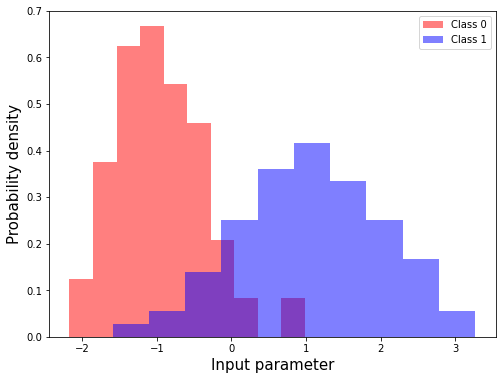

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

# histograms of the two classes
fig, ax = plt.subplots(ncols = 1, figsize = (8, 6))
ax.hist(X[y == 0], color = 'r', alpha = 0.5, label = "Class 0", density = True)
ax.hist(X[y == 1], color = 'b', alpha = 0.5, label = "Class 1", density = True)
ax.set_xlabel("Input parameter", size = 15)
ax.set_ylabel("Probability density", size = 15)
ax.legend(loc = 0)
plt.show()

### Step 2: Split the data into training and test subsets randomly

The `train_test_split` function from `scikit-learn.model_selection` subpackage makes this task quite simple.

In [8]:
# Import function for splitting data into training and testing subsets randomly
from sklearn.model_selection import train_test_split

# Here, we use the "test_size" parameter to split 40% for test, and the remaining (60%) for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=21)

Plot the original dataset (left panel) compared to the resulting subsets (right panel):

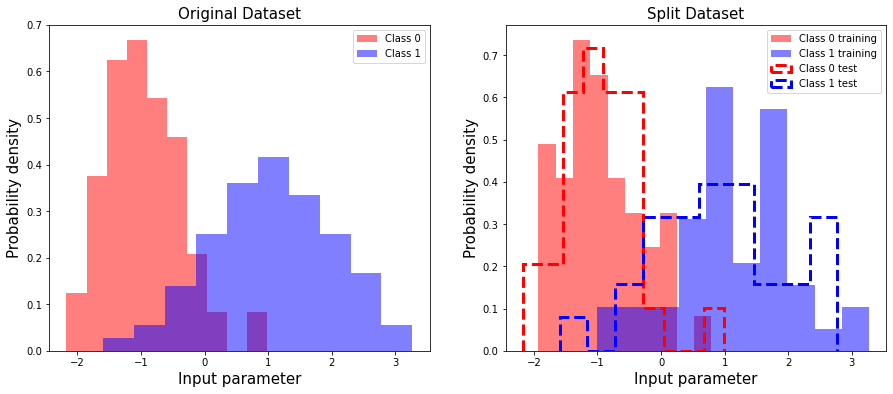

In [9]:
fig, ax = plt.subplots(ncols = 2, figsize = (15, 6))
ax[0].hist(X[y == 0], color = 'r', alpha = 0.5, label = "Class 0", density = True)
ax[0].hist(X[y == 1], color = 'b', alpha = 0.5, label = "Class 1", density = True)
ax[0].set_xlabel("Input parameter", size = 15)
ax[0].set_ylabel("Probability density", size = 15)
ax[0].legend(loc = 0)
ax[0].set_title("Original Dataset", size = 15)

ax[1].hist(X_train[y_train == 0], color = 'r', alpha = 0.5, label = "Class 0 training", density = True)
ax[1].hist(X_train[y_train == 1], color = 'b', alpha = 0.5, label = "Class 1 training", density = True)
ax[1].hist(X_test[y_test == 0], color = 'r', histtype = 'step', lw = 3, ls='--', label = "Class 0 test",
           density = True)
ax[1].hist(X_test[y_test == 1], color = 'b', histtype = 'step', lw = 3, ls='--', label = "Class 1 test",
           density = True)
ax[1].legend(loc = 1)
ax[1].set_xlabel("Input parameter", size = 15)
ax[1].set_ylabel("Probability density", size = 15)
ax[1].set_title("Split Dataset", size = 15)
plt.show()

### Step 3: Setup the classification model

There are several classification algorithms readily available in `scikit-learn`. In this case, we will use a *C-Support Vector Classifier* (SVC).

In [10]:
# We will use a C-support vector classifier, from the Support Vector Machine submodule
from sklearn.svm import SVC

# Train a C-support vector classifier, following the scikit convention:
# 1. Create an instance of the classifier
clf = SVC(kernel="linear", C=0.025, probability = True)

# 2. Do the fit
clf.fit(X_train, y_train)

# 3. Do predictions using the trained C-support vector classifier and the test data
y_test_pred = clf.predict_proba(X_test)

Below, we check the probability distributions resulting from the SVC for both classes:

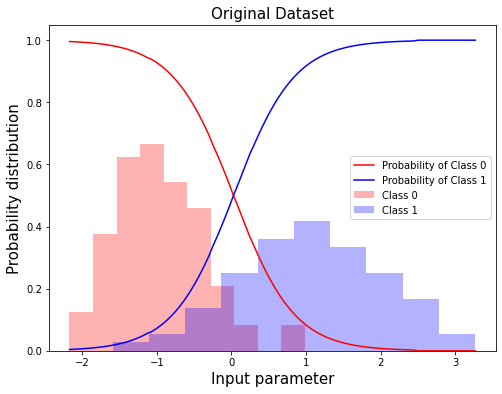

In [11]:
%matplotlib inline
import numpy as np

xs = np.linspace(min(X), max(X), 100) # Use this linear space to evaluate the distributions

fig, ax = plt.subplots(ncols = 1, figsize = (8, 6))
# Make density plots:
ax.hist(X[y == 0], color = 'r', alpha = 0.3, label = "Class 0", density = True)
ax.hist(X[y == 1], color = 'b', alpha = 0.3, label = "Class 1", density = True)
ax.set_xlabel("Input parameter", size = 15)
ax.set_ylabel("Probability distribution", size = 15)
ax.set_title("Original Dataset", size = 15)

probs = clf.predict_proba(xs)
ax.plot(xs, probs[:,0], 'r', label = "Probability of Class 0")
ax.plot(xs, probs[:,1], 'b', label = "Probability of Class 1")
ax.legend(loc = 0)
plt.show()

## 3 - Evaluation of the classifier performance

We will calculate some metrics and scores to evaluate the classifier performance for our example in 3 steps:

 1. Generate the Receiver Operating Characteristic (ROC) curve and calculate the Area Under the Curve (AUC) with: 
     - `sklearn.metrics.roc_curve`
     - `sklearn.metrics.roc_auc_score`
 2. Calculate the F1 score, Precision, and Recall with: 
     - `sklearn.metrics.f1_score`
     - `sklearn.metrics.precision_score`
     - `sklearn.metrics.recall_score`
 3. Construct and display the confusion matrix

### Step 1: Generate the ROC curve and calculate the AUC

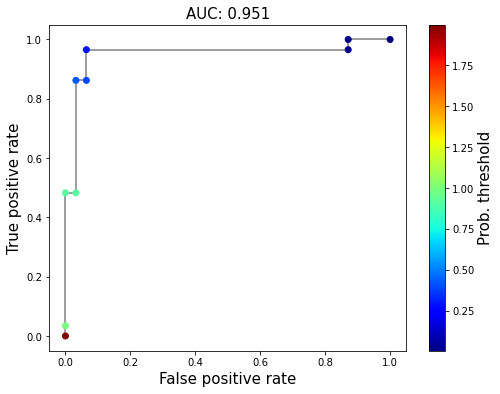

In [12]:
# Import metrics from scikit-learn
from sklearn import metrics
import matplotlib

# Use scikit-learn functions to calculate ROC and AUC score
fpr, tpr, thresh = metrics.roc_curve(y_test, y_test_pred[:,1], pos_label = 1)
_auc = metrics.roc_auc_score(y_test, y_test_pred[:,1])

# Plotting:
fig, ax = plt.subplots(figsize = (8, 6))
ax.set_title("AUC: %.3f" % _auc, size = 15)
ax.plot(fpr, tpr, zorder=1, color='grey')
sc = ax.scatter(fpr, tpr, lw = 1, c = thresh, cmap = matplotlib.cm.jet, zorder = 2)
cb = plt.colorbar(sc)
cb.set_label("Prob. threshold", size = 15)
ax.set_xlabel("False positive rate", size = 15)
ax.set_ylabel("True positive rate", size = 15)
plt.show()

### Step 2: Calculate the F1 score, Precision, and Recall

Next, we calculate the F1 score, Precision, and Recall for different probability thresholds. This is possible to do because the output of the classifier (from the `predict_proba` method) delivers the probability that the datum evaluated belongs to each class. For instance, for the first entry in the validation dataset:

In [13]:
print( "The value of the first entry in the input variable to be evaluated by the classifier is:",
      f"{X_test[0]}.")

# Evaluate this datum as an example:
_first = clf.predict_proba( np.atleast_2d(X_test[0]))
                           
print( f"The probability of belonging to the first and second class, respectively, is: {_first}.")
print( f"As it may be expected, they add up to {_first.sum()}.")

The value of the first entry in the input variable to be evaluated by the classifier is: [0.08153687].
The probability of belonging to the first and second class, respectively, is: [[0.46779744 0.53220256]].
As it may be expected, they add up to 0.9999999999999999.


In [14]:
# Calculate the F1 score for different probability thresholds
prob_val = np.linspace(0, 1, 100)
f1scores = list( map( lambda prob: metrics.f1_score( y_test, y_test_pred[:,1] >= prob), prob_val))

# Similarly, calculate Precision and Recall for the same threshold values
prescores = np.array( list( map( lambda prob: metrics.precision_score( y_test, y_test_pred[:,1] >= prob, 
                                                                     zero_division=1),prob_val)))
recscores = np.array( list( map( lambda prob: metrics.recall_score( y_test, y_test_pred[:,1] >= prob), 
                                prob_val)))

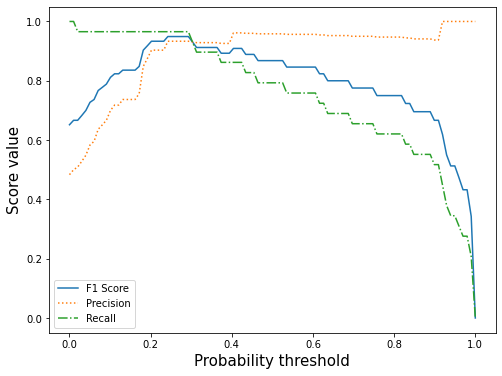

In [15]:
# Plotting results
fig, ax = plt.subplots(figsize = (8,6))
ax.plot(prob_val, f1scores, '-', label = "F1 Score")
ax.plot(prob_val, prescores, ':', label = "Precision")
ax.plot(prob_val, recscores, '-.', label = "Recall")
ax.legend(loc = 0)
ax.set_xlabel("Probability threshold", size = 15)
ax.set_ylabel("Score value", size = 15)
plt.show()

### Step 3: Construct and display the confusion matrix

We can use `Pandas` and `Seaborn` to calculate and then plot the confusion matrix.

In [16]:
import pandas as pd
import seaborn as sns

In [17]:
# Calculate the confusion matrix, we set 0.5 as the probability threshold
conf_mat = pd.crosstab( y_test, y_test_pred[:,1] >= 0.5, rownames=['Actual'], colnames=['Predicted'])

In [18]:
# Same as above, but for a normalized confusion matrix
conf_mat_norm = pd.crosstab( y_test, y_test_pred[:,1] >= 0.5, rownames=['Actual'], colnames=['Predicted'], 
                            normalize='index')

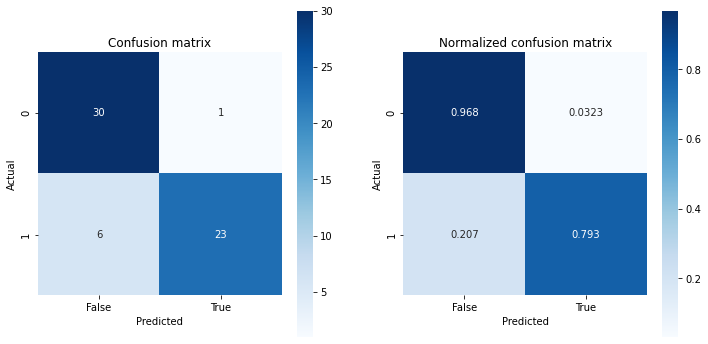

In [19]:
# Plot both matrices
fig, ax = plt.subplots(ncols=2, figsize=(12,6), subplot_kw={'aspect':'equal'})

sns.heatmap( conf_mat, annot=True, cmap=plt.cm.Blues, fmt=".3g", ax=ax[0])
ax[0].set_title('Confusion matrix')

sns.heatmap( conf_mat_norm, annot=True, cmap=plt.cm.Blues, fmt=".3g", ax=ax[1])
ax[1].set_title('Normalized confusion matrix')
plt.show()

# In Conclusion

In this notebook we have shown how to implement a binary classifier using a Support Vector Machine algorithm.

This also allowed us to learn about the Scikit-learn API and how to use it in practice. Finally, we applied some of the evaluation metrics, which also utilize Scikit-learn functions, in addition to the Matplotlib and Seaborn libraries.

An introduction to these concepts can be found in the previous notebook on Supervised Learning titled ["Introduction to Supervised Machine Learning - Basic Concepts"](https://github.com/noaodatalab/notebooks-latest/blob/master/06_EPO/LaSerenaSchoolForDataScience/2019/05_Supervised_ML_I/05_Supervised_ML_1_intro.ipynb).